## Reading image file

In [8]:
import glob
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

Matplotlib is building the font cache; this may take a moment.


In [9]:
TRAINING_PATH = '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv'
IMAGE_WIDTH = 30
IMAGE_HEIGHT = IMAGE_WIDTH

In [10]:
glob.glob('../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv')

['../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\GT-00000.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00001\\GT-00001.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00002\\GT-00002.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00003\\GT-00003.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00004\\GT-00004.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00005\\GT-00005.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00006\\GT-00006.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00007\\GT-00007.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00008\\GT-00008.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00009\\GT-00009.csv',
 '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\

In [11]:
img = Image.open("C:/Users/jeane/Documents/hands-on-2022/data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00005_00029.ppm")

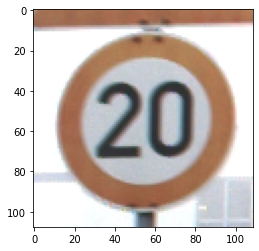

In [12]:
plt.imshow(img)

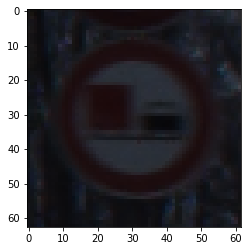

In [25]:
img = Image.open("C:/Users/jeane/Documents/hands-on-2022/data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00010/00005_00029.ppm")
plt.imshow(img)

In [14]:
def build_images_database(path):
    """
    Build a pandas dataframe with all images information. 
    
    Parameters 
    --------------
    path: path patter to read csv files containing images information

    Return
    --------
    A pandas DataFrame
    """
    df_list = []
    for filename in glob.glob(path): 
       df = pd.read_csv(filename, sep = ";")
       df['path'] = os.path.dirname(filename)+ '/'+ df['Filename']
       df_list.append(df)

    return pd.concat(df_list, ignore_index=True)


def build_images_list(filename_list, boxes_list=None):
    """Build a list of images as Numpy array
    
    Parameters
    ----------
    filename_list: list of images filenames
    boxes_list: optional list of boxes for clipping within images. Boxes are 4-tuples (x1, y1, x2, y2).
    
    Returns
    -------
    A list of images as Numpy arrays
    
    """
    
    ## if no boxes_list is given, generate a fake boxes list with None boxes
    # image.resize will take full size images if no box is given
    if boxes_list is None:
        boxes_list = [None]*len(filename_list)
    
    assert len(filename_list) == len(boxes_list), 'filenames and boxes lists must have the same length'
    
    images_list = []
    for (filename,image_box) in zip(filename_list, boxes_list):
        image = Image.open(filename)
        image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT),box=image_box)
        image = np.array(image)
        images_list.append(image)
        
    return images_list


def build_classes_array(df, col_name = 'ClassId'):
    """Build a vector (numpy array) of classes

    Parameters
    -----------
    df: pandas DataFrame with a column containing classes id

    Returns
    ----------
    Numpy array with image classes
    """
    return df[col_name].values

In [15]:
images_df = build_images_database(TRAINING_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
1,00000_00001.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
2,00000_00002.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
3,00000_00003.ppm,31,31,5,5,26,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
4,00000_00004.ppm,30,32,5,6,25,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...


In [16]:
build_classes_array(images_df)

array([ 0,  0,  0, ..., 42, 42, 42], dtype=int64)

In [17]:
images_df['ClassId'].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
22     390
36     390
40     360
20     360
21     330
39     300
29     270
24     270
27     240
42     240
32     240
41     240
19     210
37     210
0      210
Name: ClassId, dtype: int64

In [14]:
images_df['Width'].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
183       1
173       1
162       1
229       1
226       1
Name: Width, Length: 187, dtype: int64

In [15]:
images_df.query('Width == 226')['path']

27749    ../data/raw/GTSRB_Final_Training_Images/GTSRB/...
Name: path, dtype: object

In [16]:
image_list = build_images_list(images_df['path'].values[:50])

In [17]:
image_list[0]

array([[[ 75,  78,  80],
        [ 74,  76,  78],
        [ 85,  86,  84],
        ...,
        [ 68,  75,  74],
        [ 65,  69,  68],
        [ 66,  67,  66]],

       [[ 83,  84,  86],
        [ 80,  80,  82],
        [ 88,  88,  83],
        ...,
        [ 73,  77,  78],
        [ 76,  78,  75],
        [ 80,  80,  78]],

       [[ 78,  78,  80],
        [ 86,  85,  86],
        [ 90,  89,  90],
        ...,
        [ 71,  74,  71],
        [ 73,  74,  69],
        [ 78,  78,  74]],

       ...,

       [[133, 134, 139],
        [123, 127, 132],
        [112, 121, 125],
        ...,
        [ 94,  95,  89],
        [ 97,  98,  91],
        [ 99, 103,  99]],

       [[ 91,  95,  99],
        [ 91,  98, 103],
        [ 75,  86,  90],
        ...,
        [104, 102,  96],
        [110, 113, 104],
        [ 96, 104,  98]],

       [[ 85,  84,  87],
        [ 95, 101, 107],
        [ 63,  76,  81],
        ...,
        [103, 103,  95],
        [ 99, 102,  90],
        [ 90,  97,  89]]

In [18]:
images_df.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),axis = 1)

0        (5, 6, 24, 25)
1        (5, 5, 25, 25)
2        (5, 5, 25, 25)
3        (5, 5, 26, 26)
4        (5, 6, 25, 26)
              ...      
39204    (5, 6, 47, 51)
39205    (5, 5, 51, 53)
39206    (5, 6, 53, 57)
39207    (5, 7, 58, 63)
39208    (7, 6, 62, 63)
Length: 39209, dtype: object

In [19]:
# Reading only 200 images for the moment
images_list = build_images_list(images_df.head(200)['path'].values,
                                images_df.head(200).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                         axis=1).values)

In [20]:
images_list[0]

array([[[190,  63,  67],
        [195,  67,  73],
        [199,  72,  76],
        ...,
        [142, 109, 100],
        [150, 113, 101],
        [152, 106,  94]],

       [[187,  84,  85],
        [186,  83,  86],
        [186,  84,  87],
        ...,
        [120, 101,  96],
        [124, 101,  95],
        [126,  94,  89]],

       [[176, 115, 117],
        [173, 118, 122],
        [172, 121, 126],
        ...,
        [ 88,  76,  75],
        [ 90,  75,  74],
        [ 94,  74,  74]],

       ...,

       [[114, 140, 130],
        [ 92, 125, 115],
        [ 74, 110,  94],
        ...,
        [ 80,  75,  76],
        [ 79,  77,  79],
        [ 84,  84,  87]],

       [[113, 140, 133],
        [ 92, 126, 117],
        [ 74, 114,  97],
        ...,
        [ 79,  75,  78],
        [ 78,  77,  79],
        [ 82,  83,  85]],

       [[118, 142, 139],
        [ 96, 129, 121],
        [ 78, 118,  99],
        ...,
        [ 79,  76,  82],
        [ 76,  76,  80],
        [ 79,  80,  82]]

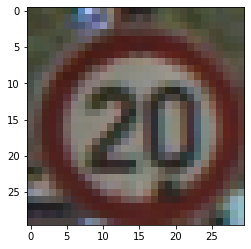

In [21]:
plt.imshow(images_list[190])

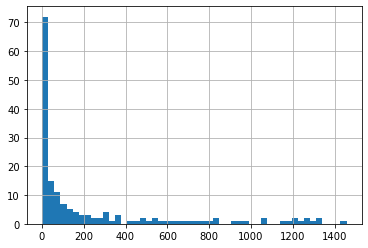

In [22]:
(images_df['Roi.X2'] - images_df['Roi.X1']).value_counts().hist(bins = 50)

In [23]:
(images_df['Roi.X2'] - images_df['Roi.X1']).median()

33.0

In [24]:
(images_df['Roi.Y2'] - images_df['Roi.Y1']).median()

32.0

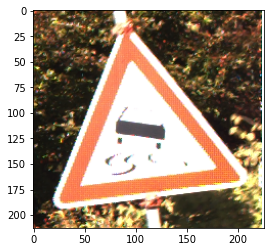

In [25]:
plt.imshow(Image.open(images_df.query('Width == 226')['path'].values[0]))

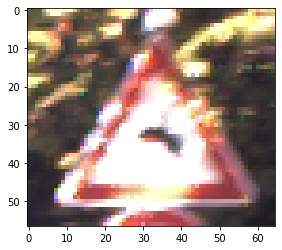

In [26]:
plt.imshow(Image.open(images_df.query('ClassId== 19').iloc[0]['path']))

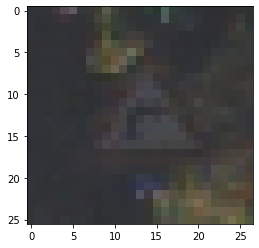

In [27]:
plt.imshow(Image.open(images_df.query('ClassId== 20').iloc[0]['path']))

## Training model

In [32]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [35]:
# Reading only 200 images for the moment

N = 10_000

images_list = build_images_list(images_df.head(N)['path'].values,
                                images_df.head(N).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                         axis=1).values)


# prepare data and labels for training
data = np.array(images_list)
labels = build_classes_array(images_df)[:N]

print(data.shape, labels.shape)

(10000, 30, 30, 3) (10000,)


In [36]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 30, 30, 3) (2000, 30, 30, 3) (8000,) (2000,)


In [37]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [38]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
250/250 [==============================] - 29s 115ms/step - loss: 1.2989 - accuracy: 0.6582 - val_loss: 0.2077 - val_accuracy: 0.9520
Epoch 2/15
250/250 [==============================] - 28s 111ms/step - loss: 0.2848 - accuracy: 0.9206 - val_loss: 0.0839 - val_accuracy: 0.9830
Epoch 3/15
250/250 [==============================] - 27s 106ms/step - loss: 0.1573 - accuracy: 0.9582 - val_loss: 0.0491 - val_accuracy: 0.9900
Epoch 4/15
250/250 [==============================] - 28s 112ms/step - loss: 0.1099 - accuracy: 0.9705 - val_loss: 0.0337 - val_accuracy: 0.9925
Epoch 5/15
250/250 [==============================] - 27s 109ms/step - loss: 0.1033 - accuracy: 0.9701 - val_loss: 0.0329 - val_accuracy: 0.9920
Epoch 6/15
250/250 [==============================] - 29s 115ms/step - loss: 0.0841 - accuracy: 0.9769 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 7/15
250/250 [==============================] - 30s 120ms/step - loss: 0.0962 - accuracy: 0.9751 - val_loss: 0.0270 - val_ac

In [40]:
import keras
keras.__version__

'2.4.3'

In [41]:
tf.__version__

'2.3.0'

In [1]:
from tensorflow import keras

In [ ]:
from tensorflow import keras

In [6]:
test_model = keras.models.load_model('C:/Users/jeane/Documents/new-hands-on-2021/models/traffic_signs_2021-03-19_20-35-31.h5')

In [7]:
test_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 64)         

In [19]:
def classify_image(path, model, image_box=None):
  """Classify image by model

  Parameters
  ----------
  path: filepath to image
  model: tf/keras classifier

  Returns
  -------
  class id returned by model classifier
  """
  images_list = []
  image = Image.open(path)
  image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box) # box argument clips image to (x1, y1, x2, y2)
  image = np.array(image)
  images_list.append(image)
  
  return model.predict_classes(np.array(images_list))

In [22]:
image_sample['path'].values[0]

'../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00003/00001_00020.ppm'

In [27]:
image_sample = images_df.sample(1)

classify_image(image_sample['path'].values[0],
               test_model,
               image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  axis=1).values[0]
               )

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([11], dtype=int64)

In [ ]:
img = Image.open("C:/Users/jeane/Documents/hands-on-2022/data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00010/00005_00029.ppm")
plt.imshow(img)

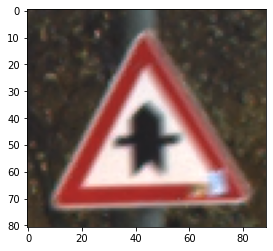

In [30]:
plt.imshow(Image.open(image_sample["path"].values[0])) ##puis vérifier si la classification est juste en regardant le dictionnaire constante